<a href="https://colab.research.google.com/github/MohsenLotfii/School_electricity/blob/main/1_Schools_electricity_for_each_schools_(1st_week_of_Feb_2023_%26_2024)__19_Sep_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


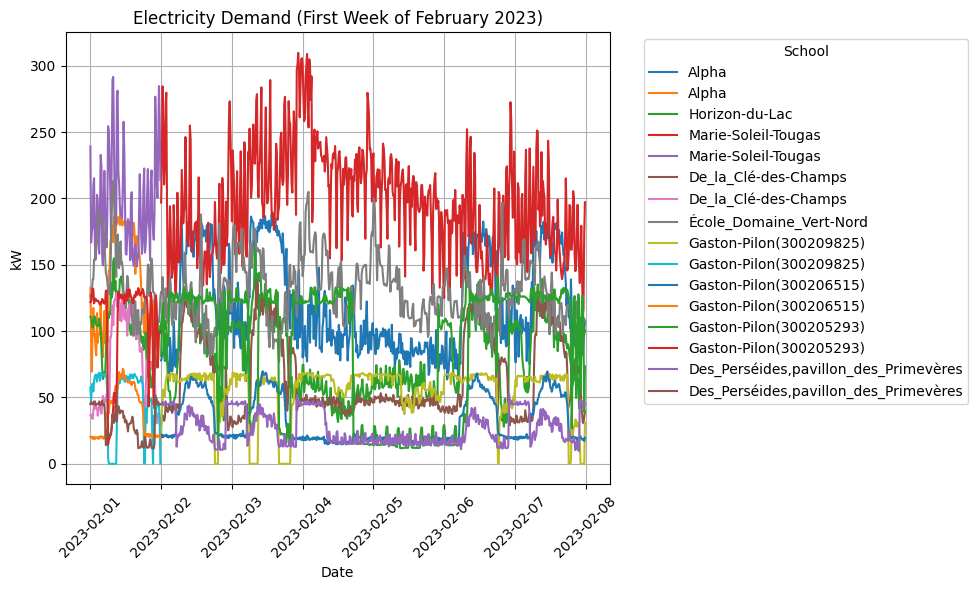

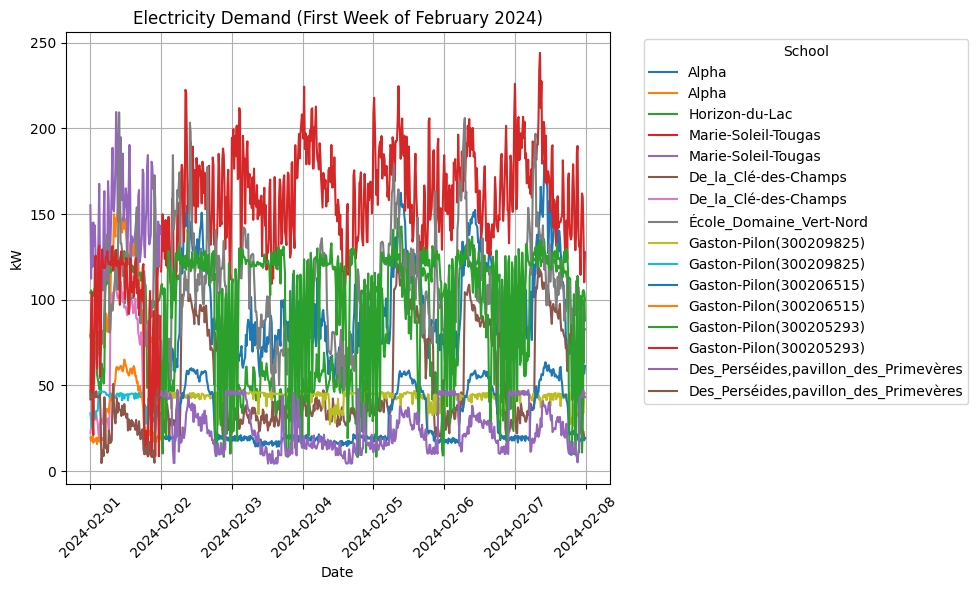

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import re

# List of paths for different schools
schoolPaths = [
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Alpha",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Horizon-du-Lac",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Marie-Soleil-Tougas",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/De_la_Clé-des-Champs",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/École_Domaine_Vert-Nord",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Gaston-Pilon(300209825)",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Gaston-Pilon(300206515)",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Gaston-Pilon(300205293)",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Des_Perséides,pavillon_des_Primevères",
]

# Function to filter data for the first week of February
def filter_february_first_week(df, year):
    # Filter data for the first week of February of the given year
    start_date = pd.to_datetime(f'{year}-02-01') # Convert start date to Timestamp
    end_date = pd.to_datetime(f'{year}-02-08')   # Convert end date to Timestamp
    df_filtered = df[(df.iloc[:, 1] >= start_date) & (df.iloc[:, 1] < end_date)]
    return df_filtered

# Function to plot data for a specific year
def plot_data_for_year(year):
    plt.figure(figsize=(10, 6))

    # Loop through each school path
    for schoolPath in schoolPaths:
        # Get a list of all CSV files in the directory
        csv_files = [f for f in os.listdir(schoolPath) if f.endswith('.csv')]

        # Loop over each CSV file and plot the data
        for file in csv_files:
            full_path = os.path.join(schoolPath, file)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(full_path, delimiter=';', decimal=',')

            # Convert the second column (Date and time) to datetime
            df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1], errors='coerce')

            # Drop rows with invalid or missing datetime values
            df = df.dropna(subset=[df.columns[1]])

            # Ensure there are enough columns and clean the 'Real power' column
            if df.shape[1] >= 3:
                df.iloc[:, 2] = pd.to_numeric(df.iloc[:, 2], errors='coerce')
                df = df.dropna(subset=[df.columns[2]])

                # Filter data for the first week of February of the given year
                df_filtered = filter_february_first_week(df, year)

                # If there's no data for the specified week, skip this file
                if df_filtered.empty:
                    continue

                # Plot the data
                school_name = os.path.basename(schoolPath)
                plt.plot(df_filtered.iloc[:, 1], df_filtered.iloc[:, 2], label=school_name)

    # Set axis labels and title
    plt.xlabel('Date')
    plt.ylabel('kW')
    plt.title(f'Electricity Demand (First Week of February {year})')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add a grid and legend
    plt.grid(True)
    plt.legend(title="School", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to prevent label cutting
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot data for 2023
plot_data_for_year(2023)

# Plot data for 2024
plot_data_for_year(2024)
